In [173]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Lambda, Flatten, Dropout, Reshape
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder

import pandas as pd

np.random.seed(1)

test = pd.read_csv('./digit-recognizer/test.csv')

train = pd.read_csv('./digit-recognizer/train.csv')
# valid = pd.read_csv('./digit-recognizer/valid.csv')

In [145]:
# import csv
# import random

# reader = csv.reader(open('./digit-recognizer/train.csv', 'r'))
# trainWriter = csv.writer(open('./digit-recognizer/train2.csv', 'w'))
# validWriter = csv.writer(open('./digit-recognizer/valid.csv', 'w'))

# headers = reader.next()
# trainWriter.writerow(headers)
# validWriter.writerow(headers)

# for row in reader:
#     if(random.random() < .8):
#         trainWriter.writerow(row)
#     else:
#         validWriter.writerow(row)

In [103]:
def ConvBlock(model, filters):
#     model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(filters, 3, 3, activation='relu', input_shape=(28, 28, 1)))
#     model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    return model

In [104]:
from keras.models import load_model
model = load_model('digit_recognizer_model.h5')

In [174]:
# Prep data and labels for training
X_train = (train.ix[:,1:].values).astype('float32')
y_train = (train.ix[:,0].values.astype('int32'))

# X_valid = (valid.ix[:,1:].values).astype('float32')
# y_valid = (valid.ix[:,0].values.astype('int32'))

X_test = (test.values).astype('float32')

Y_train = onehot(y_train)
# Y_valid = onehot(y_valid)

In [189]:
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)

def standardize(x): 
    return (x-mean_px)/std_px

model = Sequential()
model.add(Reshape((28,28,1), input_shape=(784,)))
model.add(Lambda(standardize, input_shape=(28,28,1)))
# model = ConvBlock(model, 32)
# model = ConvBlock(model, 128)
# model = ConvBlock(model, 256)
# model = ConvBlock(model, 512)

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, input_shape=(784,), activation='softmax'))
# model.add(Dense(400, input_shape=(784,), activation='sigmoid'))
# model.add(Dense(200, input_shape=(400,), activation='sigmoid'))
# model.add(Dense(100, input_shape=(200,), activation='sigmoid'))
# model.add(Dense(50, input_shape=(100,), activation='sigmoid'))
# model.add(Dense(10, input_shape=(50,), activation='softmax'))
# model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['accuracy'])
model.compile(optimizer=RMSprop(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [148]:
def onehot(x): return np.array(OneHotEncoder().fit_transform(x.reshape(-1,1)).todense())

In [191]:
# model.fit(X_train, Y_train, nb_epoch=5, batch_size=20, validation_data=(X_valid, Y_valid))
model.fit(X_train, Y_train, nb_epoch=5, batch_size=20)
# model.summary()

Epoch 1/5
42000/42000 [==============================] - 250s - loss: 0.1250 - acc: 0.9649   
Epoch 2/5
42000/42000 [==============================] - 250s - loss: 0.0816 - acc: 0.9774   
Epoch 3/5
42000/42000 [==============================] - 254s - loss: 0.0579 - acc: 0.9849   
Epoch 4/5
42000/42000 [==============================] - 258s - loss: 0.0465 - acc: 0.9885   
Epoch 5/5
42000/42000 [==============================] - 261s - loss: 0.0365 - acc: 0.9914   


## Gut Check

In [167]:
# Function to visualize
#Convert train datset to (num_images, img_rows, img_cols) format 
def visualize(data, scores):
    i = 0
    for img in data:
        plt.subplot(330 + (i+1))
        plt.imshow(img, cmap=plt.get_cmap('gray'))
        i += 1
    print(scores)
    
# for i in range(0, 9):
#     plt.subplot(330 + (i+1))
#     plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
#     plt.title(y_train[i]);

In [171]:
X_train_visualize = X_train.reshape(X_train.shape[0], 28, 28)
visualize(X_valid_visualize[18:18], y_train[9:18])

# print(model.summary())

[3 8 9 1 3 3 1 2 0]


In [40]:
model.save('digit_recognizer_model.h5') #.9863 #0.97471

In [15]:
# score = model.evaluate(X_train, Y_train, verbose=1)
# model.predict(X_test)
# print('Test score:', score[0])
# print('Test accuracy:', score[1])

[[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   188.  255.   94.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.  191.  250.  253. 

In [192]:
outputFile = open('./digit-recognizer/nn-submission.csv', 'w')

In [193]:
test_predictions = model.predict_classes(X_test, verbose=1)

28000/28000 [==============================] - 16s    


In [194]:
i = 0
outputFile.write('ImageId,Label\n')
for prediction in test_predictions:
    outputFile.write( str(i + 1) + ',' + str(prediction) + '\n')
    i += 1

[9 0 9 1 1 5 7 4 2]


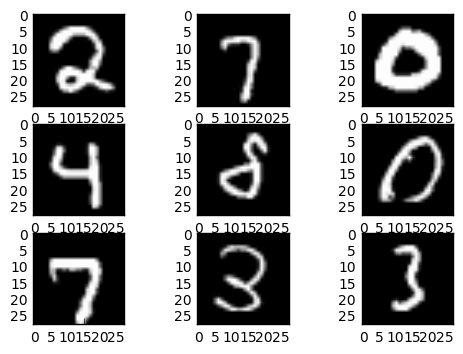

In [195]:
X_valid_visualize = X_valid.reshape(X_valid.shape[0], 28, 28)
visualize(X_valid_visualize[18:27], test_predictions[18:27])

In [196]:
outputFile.close()

In [197]:
pd.read_csv('./digit-recognizer/nn-submission.csv')

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3


In [4]:
array = np.array([1, 2, 3, 4])

In [5]:
array.reshape((2,2))

array([[1, 2],
       [3, 4]])

In [11]:
img = np.zeros((784,))

In [13]:
img.reshape((28, 28))

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0